<a href="https://colab.research.google.com/github/huggoparcelly/exercicio-vdd/blob/main/HuggoParcelly_NotebookDadosTurma_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1

## Objetivo
Analisar a distribuição estatística das linguagens de programação que a turma conhece, com os quantitativos de alunos que conhecem cada linguagem

## Mapeamento dos dados


Realiza a leitura do arquivo CSV e cria o dataframe com pandas

In [ ]:
import pandas as pd

file_path = '/content/dataset-anonimizado.csv'

df = pd.read_csv(file_path, encoding='latin-1', sep=';')
print(df.head())

                         Data      Grupos Gênero Qual a sua idade?  \
0   quinta, 1 Fev 2024, 21:34  T1_Grupo_B      M             23-24   
1   quinta, 1 Fev 2024, 10:57  T1_Grupo_B      M             23-24   
2  domingo, 4 Fev 2024, 12:41  T1_Grupo_B      M             21-22   
3    terça, 6 Fev 2024, 13:30  T1_Grupo_D      M             23-24   
4   quinta, 1 Fev 2024, 09:47  T1_Grupo_C      F             19-20   

  Qual a sua cidade natal? (Responder no formato: CIDADE - UF)  \
0                                      Parelhas - RN             
1                                  Campina Grande-PB             
2                                Campina Grande - PB             
3                                  Campina Grande-PB             
4                                        Maceió - AL             

  Hora Início Av1 Hora Fim Av1  Nota Av1  \
0           16:10        16:56       NaN   
1           16:10        16:58       NaN   
2           16:10        16:45       NaN   
3     

- Cria o dataframe para as linguaguens
- Realiza o tratamento dos dados, para capturar cada linguagem individualmente
- Transforma em um formato mais adequando para visualização, com ```melt()```
- Realiza o agrupamento das linguagens com seus repectivos valores ordenados

In [ ]:
df_languages = df['Marque as linguagens de programação que você já teve algum contato prático:']
df_languages = df_languages.str.split('\n', expand=True)

data = df_languages.melt()
data.columns = ['value',  'language']

data = data.groupby('language').size().sort_values()

print(data)

language
C              1
C++            2
R              4
TypeScript     4
Java           9
JavaScript     9
Python        10
dtype: int64


- Geração da visualização, utilizando matplotlib

Analisar a distribuição estatística das linguagens de programação que a turma conhece, com os quantitativos de alunos que conhecem cada linguagem

- A partir da analise da visualização podemos concluir que a linguagem que os alunos tem mais conhecimentos é Python. Isso pode ser atribuido ao fato de que os alunos utilizam a linguagem em díversas disciplinas, o que torna ela mais popular entre a turma.

- Outra observação pode ser feita para a linguagem C, que é a linguagem que apenas 1 aluno da turma conhece ou já teve contado. Também pode ser dado pelo fato de que no curso existem poucas disciplinas que lidam com tal linguagem diretamente.

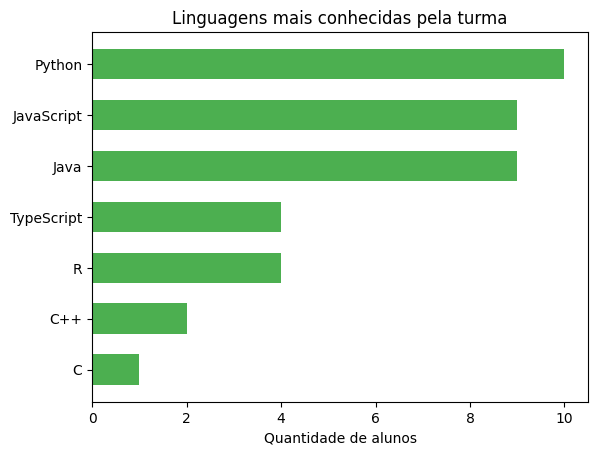

In [ ]:
import matplotlib.pyplot as plt

plt.barh(data.index, data, color="#4CAF50", height=0.6)
plt.title('Linguagens mais conhecidas pela turma')
plt.xlabel('Quantidade de alunos')

plt.show()

# Projeto 2

## Objetivo
Confirmar ou refutar a hipótese científica de que existe relação entre a quantidade de semestres para se formar, a quantidade de linguagens de programação e/ou a experiência de participação em P&D.
Caso a relação seja confirmada, entender se seria forte ou fraca.

## Mapeamento dos dados

- Cria o dataframe de semestres faltantes x experiência de participação em P&D x quantidade de linguagem de programação
- Realiza o tratamento dos dados para facilitar em uma melhor visualização

In [ ]:
df_of_interest = ['Quantos semestres faltam para você se formar?',
                  'Você já teve experiência de participação em projetos de Pesquisa e Desenvolvimento?',
                  'Marque as linguagens de programação que você já teve algum contato prático:']

# Cria uma cópia para evitar alterações no dataframe original
df_hipotese = df[df_of_interest].copy()
# Altera o nome das colunas
df_hipotese.columns = ['quant_semester', 'exp_projeto', 'quant_languanges']

# Trata a coluna da quantidade de semestres faltantes para retornar apenas o numero
df_hipotese['quant_semester'] = df_hipotese['quant_semester'].str[:1]

# Trata a coluna de quantidade de linguages, separando cada linguagem e retornando a quantidade
df_hipotese['quant_languanges'] = df_hipotese['quant_languanges'].str.split('\n').apply(len)

df_hipotese = df_hipotese.sort_values('quant_semester')
print(df_hipotese)


  quant_semester exp_projeto  quant_languanges
0              0         Sim                 7
1              0         Sim                 3
2              0         Não                 4
5              0         Não                 4
6              0         Sim                 4
8              1         Não                 5
9              2         Sim                 4
7              3         Sim                 3
3              4         Sim                 2
4              5         Sim                 3


## Plotagem do gráfico

- Separou-se os dados em dois dataframes, um com os alunos que participaram de projetos e outro os que não participaram
- Optou-se por plotar dois gráficos de dispersão para se ter uma melhor visualização, pois existem alguns alunos que tem a mesma quantidade de linguagens e que são de categorias diferentes, quanto a participação em projetos.

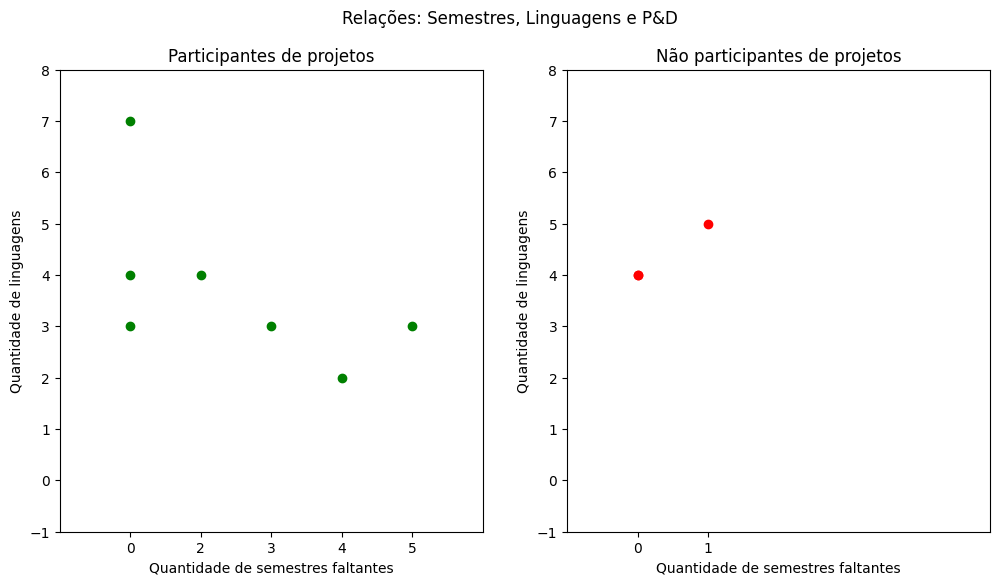

In [ ]:
import matplotlib.pyplot as plt

#Divisão dos dataframes
df_exp_yes = df_hipotese[df_hipotese.exp_projeto.str.lower() == "sim"]
df_exp_no = df_hipotese[df_hipotese.exp_projeto.str.lower() == "não"]

# Definição dos limites de plotagem do gráfico
x_min = -1
x_max = 5
y_min = -1
y_max = 8

plt.figure(figsize = ((12, 6)))

# Plotagem do primeito gráfico de dispersão
plt.subplot(1,2,1)
plt.scatter(df_exp_yes.quant_semester, df_exp_yes.quant_languanges, c='green')
plt.title('Participantes de projetos')
plt.xlabel('Quantidade de semestres faltantes')
plt.ylabel('Quantidade de linguagens')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plotagem do segundo gráfico de dispersão
plt.subplot(1,2,2)
plt.scatter(df_exp_no.quant_semester, df_exp_no.quant_languanges, c='red')
plt.title('Não participantes de projetos')
plt.xlabel('Quantidade de semestres faltantes')
plt.ylabel('Quantidade de linguagens')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.suptitle('Relações: Semestres, Linguagens e P&D')

plt.show()

## Conclusão sobre a hipótese

- De acordo com os gráficos é possível que exista uma relação entre a quantidade de semestres que faltam para terminar o curso, com a quantidade de linguagens aprendidas, pois quanto mais tempo de curso é possível que tenha-se tido o contato com diversas linguagens de programação.
- Contudo, essa relação é fraca, pois pode-se notar que existem pessoas que faltam mais períodos para terminar o curso e tem o conhecimento da mesma quantidade de linguagens que pessoas que se formarão no atual período.